I've been given a new task to study how scale dependent bias varias as a function of HOD params and 

In [1]:
from pearce.mocks.kittens import cat_dict
import numpy as np
from scipy.stats import binned_statistic, linregress

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [4]:
cosmo_params = {'simname':'chinchilla', 'Lbox':400.0, 'scale_factors':[0.658, 1.0]}

In [5]:
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [6]:
cat.load(1.0, HOD='hsabRedMagic')#, hod_kwargs = {'sec_haloprop_key':'halo_log_nfw_conc'})#, hod_kwargs={'split': 0.5})

In [7]:
cat.model.param_dict

{'alpha': 1.02,
 'f_c': 0.19,
 'logM0': 12.2,
 'logM1': 13.7,
 'logMmin': 12.1,
 'mean_occupation_centrals_assembias_param1': 0.5,
 'mean_occupation_satellites_assembias_param1': 0.5,
 'sigma_logM': 0.46}

In [8]:
fiducial_point = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 1.0, 'sigma_logM': 0.46,
                 'mean_occupation_centrals_assembias_param1':0.0,
                 'mean_occupation_satellites_assembias_param1':0.0,}
hod_params = dict(fiducial_point)

In [21]:
#w(theta) + bias comparison
hod_params['mean_occupation_centrals_assembias_param1'] = 0.0
hod_params['mean_occupation_satellites_assembias_param1'] = 0.0
hod_params['logMmin'] = 12.089
hod_params['sigma_logM'] = 0.33
hod_params['f_c'] = 1.0
hod_params['alpha'] = 1.1
hod_params['logM1'] = 13.3
hod_params['logM0'] = hod_params['logMmin']

In [22]:
rbins = np.logspace(-1,1.5,15)
rbc = (rbins[1:]+rbins[:-1])/2

In [23]:
cat.populate(hod_params)

In [24]:
bias = cat.calc_bias(rbins, use_corrfunc = False)

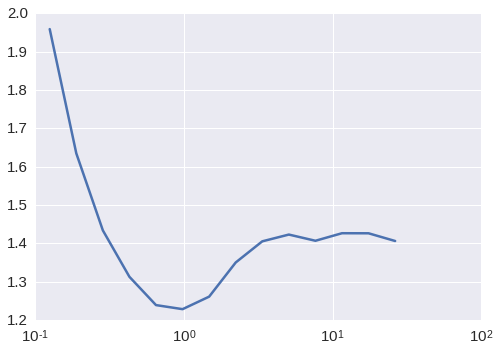

In [25]:
plt.plot(rbc, bias)
plt.xscale('log')

In [26]:
np.sqrt(bias[-1])

1.1859394337876383

In [29]:
np.sum(cat.model.mock.galaxy_table['gal_type']=='satellites')*1.0/len(cat.model.mock.galaxy_table)

0.21630654836077606

In [88]:
varied_param = 'logMmin'
min_val, max_val = 12.0, 13.5
N = 10
varied_param_vals = np.linspace(min_val, max_val, N)
bias_vals = np.zeros((N, len(rbc)))
params = hod_params.copy()
for i, p in enumerate(varied_param_vals):
    params[varied_param] = p
    cat.populate(params)
    bias_vals[i, :] = cat.calc_bias(rbins)

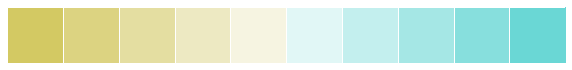

In [117]:
colors = sns.diverging_palette(80, 190,l= 80, n=N)
sns.palplot(colors)

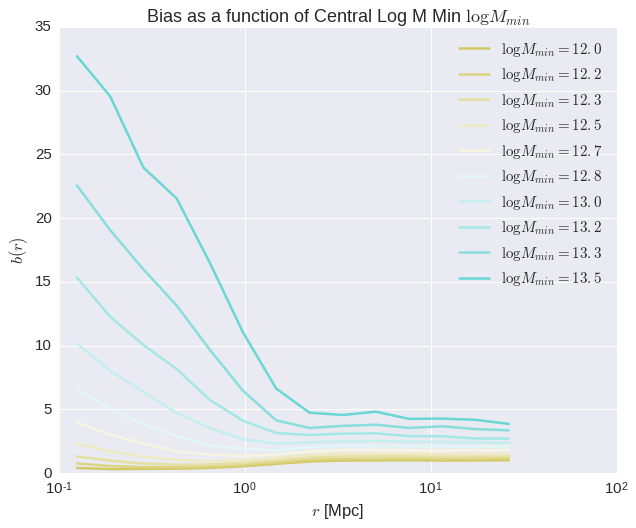

In [118]:
fig = plt.figure(figsize=(10,8))
for label, value, c in zip(varied_param_vals, bias_vals, colors):
    plt.plot(rbc, value, label = r'$\log{M_{min}}= %.1f$'%label, color = c)
    
plt.xscale('log')
plt.legend(loc = 'best')
plt.xlabel(r'$r$ [Mpc]')
plt.ylabel(r'$b(r)$')
plt.title(r'Bias as a function of Central Log M Min $\log{M_{min}}$')